In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
with open('pipeline_metrics.json', 'r') as file:
    data = json.load(file)['results']

In [12]:
df = pd.DataFrame(data)
df.head(40)

,model,vector_db,chunk_size,overlap,num_chunks,chunking_time,embedding_time,db_time,memory_usage_mb
0,thenlper/gte-base,redis,200,0,52,0.117451,1.505441,0.102045,846.828125
1,thenlper/gte-base,redis,200,50,70,0.024857,1.180164,0.150280,885.226562
2,thenlper/gte-base,redis,200,100,104,0.016080,1.833054,0.212946,936.703125
3,thenlper/gte-base,redis,500,0,21,0.016875,0.968842,0.030817,954.152344
4,thenlper/gte-base,redis,500,50,24,0.007429,1.272367,0.036151,969.183594
5,thenlper/gte-base,redis,500,100,26,0.007578,1.133241,0.039600,985.269531
6,thenlper/gte-base,redis,1000,0,11,0.007671,0.691850,0.020694,1001.144531
7,thenlper/gte-base,redis,1000,50,11,0.005997,0.591670,0.017024,1003.105469
8,thenlper/gte-base,redis,1000,100,12,0.006666,0.727232,0.023323,1016.585938
9,thenlper/gte-base,chroma,200,0,52,0.007152,0.796510,0.041093,1017.453125


In [13]:
df['model'].replace(['thenlper/gte-base', 'sentence-transformers/all-mpnet-base-v2','hkunlp/instructor-xl'], ['gte-base', 'mpnet','instructor-xl'], inplace=True)

/var/folders/pv/dgx586t95xn1cl6sps79kygh0000gn/T/ipykernel_92242/3202339830.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['model'].replace(['thenlper/gte-base', 'sentence-transformers/all-mpnet-base-v2','hkunlp/instructor-xl'], ['gte-base', 'mpnet','instructor-xl'], inplace=True)


In [14]:
df

,model,vector_db,chunk_size,overlap,num_chunks,chunking_time,embedding_time,db_time,memory_usage_mb
0,gte-base,redis,200,0,52,0.117451,1.505441,0.102045,846.828125
1,gte-base,redis,200,50,70,0.024857,1.180164,0.150280,885.226562
2,gte-base,redis,200,100,104,0.016080,1.833054,0.212946,936.703125
3,gte-base,redis,500,0,21,0.016875,0.968842,0.030817,954.152344
4,gte-base,redis,500,50,24,0.007429,1.272367,0.036151,969.183594
...,...,...,...,...,...,...,...,...,...
76,mpnet,qdrant,500,50,24,0.011910,3.160059,1.078486,60.363281
77,mpnet,qdrant,500,100,26,0.010459,2.486497,0.166636,86.812500
78,mpnet,qdrant,1000,0,11,0.008519,3.669286,0.189021,50.273438
79,mpnet,qdrant,1000,50,11,0.012817,0.805167,0.160181,86.332031


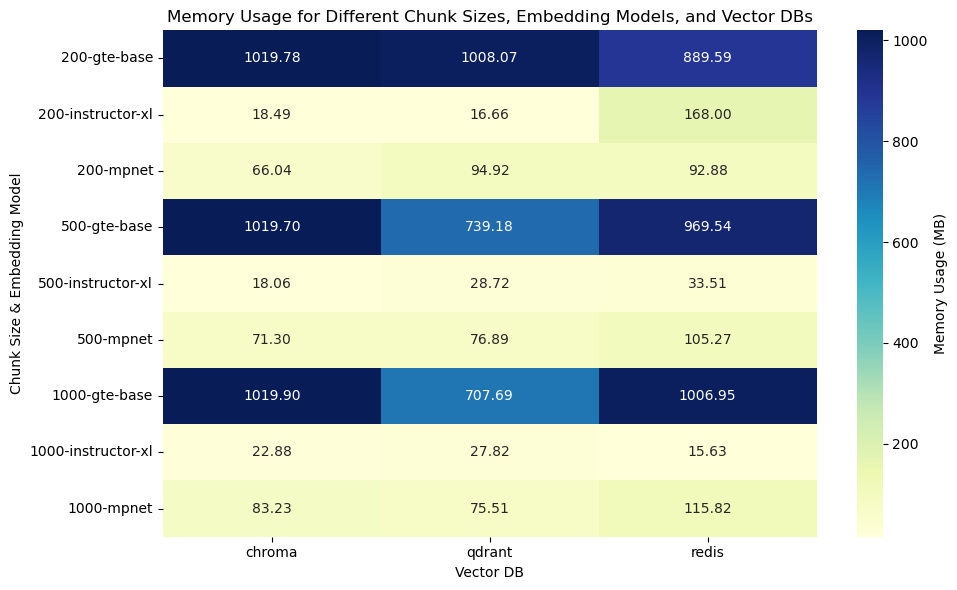

In [22]:
heatmap_data = df.pivot_table(index=["chunk_size","model"], columns=["vector_db"], values="memory_usage_mb")

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Memory Usage (MB)'})
plt.title("Memory Usage for Different Chunk Sizes, Embedding Models, and Vector DBs")
plt.xlabel("Vector DB")
plt.ylabel("Chunk Size & Embedding Model")
plt.tight_layout()

plt.show()

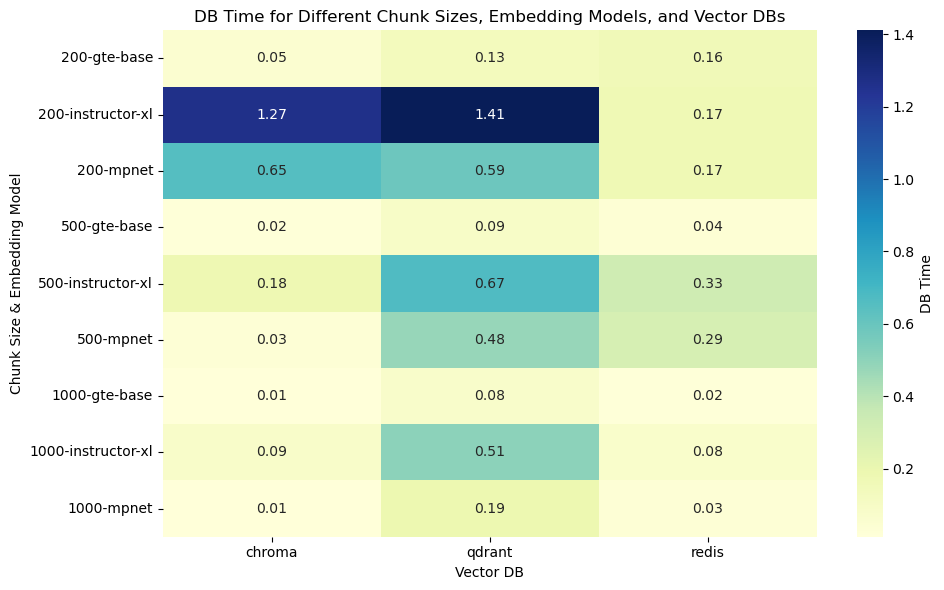

In [23]:
heatmap_data = df.pivot_table(index=["chunk_size","model"], columns=["vector_db"], values="db_time")

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'DB Time'})
plt.title("DB Time for Different Chunk Sizes, Embedding Models, and Vector DBs")
plt.xlabel("Vector DB")
plt.ylabel("Chunk Size & Embedding Model")
plt.tight_layout()

plt.show()

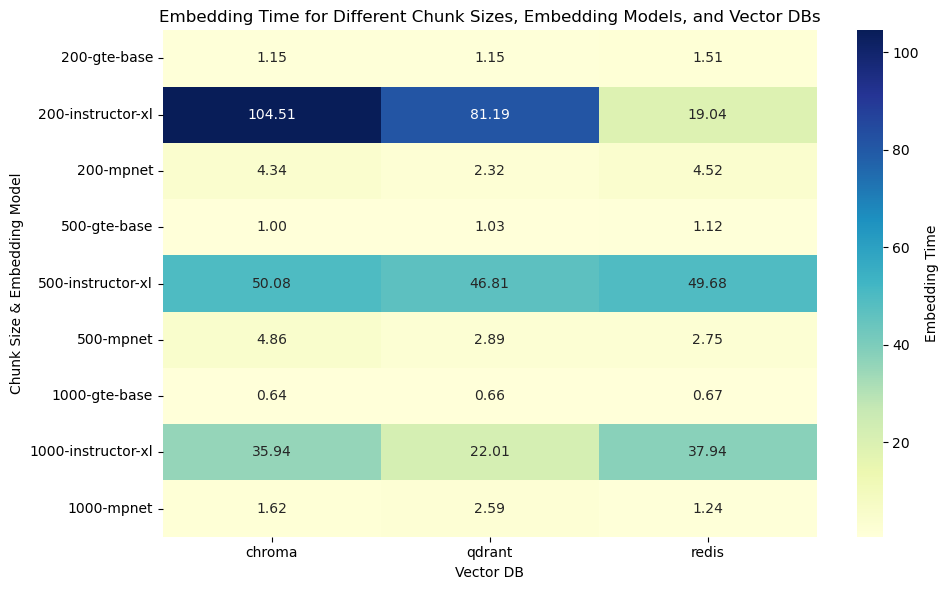

In [24]:
heatmap_data = df.pivot_table(index=["chunk_size","model"], columns=["vector_db"], values="embedding_time")

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Embedding Time'})
plt.title("Embedding Time for Different Chunk Sizes, Embedding Models, and Vector DBs")
plt.xlabel("Vector DB")
plt.ylabel("Chunk Size & Embedding Model")
plt.tight_layout()

plt.show()